In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [5]:
df = pd.read_csv('data/tweet_data.csv')

# EDA

In [20]:
df.sample(10)

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
499443,1127966532909223936,2019-05-13 15:59:12,-1,-1,43,False,True,False,36,NaN,7,-1,Digital Trends Live - 5.13.19 - Amazon Adds Mo...,Technology,2157037,14763734,Digital Trends,NaN
244708,1101665929895862276,2019-03-02 02:10:00,1,5004,261,True,True,False,183,NaN,78,-1,"On Saturday, NASA will attempt to send into or...",News,16434218,3108351,The Wall Street Journal,https://video.twimg.com/amplify_video/11016205...
288798,907397158122295297,2017-09-12 00:15:15,-1,-1,153015,False,True,True,89683,NaN,63332,781427301472874497,This dude definitely tryna die https://t.co/9Y...,Interesting,359513,215152933,Cause We're Comedy,https://video.twimg.com/ext_tw_video/905106711...
626763,1141001396139036674,2019-06-18 15:15:06,1,5006,353,True,True,False,291,NaN,62,-1,"""Your species isn't known for moving quickly.""...",News,16068527,14293310,TIME,NaN
650783,1143089184271417344,2019-06-24 09:31:13,-1,-1,69,False,True,False,46,https://pbs.twimg.com/media/D90Rjj5XYAIMV3U.jpg,23,-1,Turkish assets rally after opposition wins Ist...,News,20531527,1652541,Reuters Top News,NaN
446019,1122229068538286080,2019-04-27 20:00:34,1,5003,3942,True,True,False,2937,NaN,1005,-1,Physics is fun 😍 https://t.co/qxBWZKgcHE,Interesting,304257,934281246435405824,Physics & Astronomy Zone,https://video.twimg.com/ext_tw_video/112222898...
618421,1140262883911229440,2019-06-16 14:20:31,1,5006,265,True,True,False,183,NaN,82,-1,Fox News poll shows Trump currently losing to ...,News,3332418,2884771,Newsweek,NaN
1528,1071066153437540353,2018-12-07 15:37:25,-1,-1,309,False,True,False,264,NaN,45,-1,New Zealand https://t.co/FwLwVgVxFK,Travel,81979,1008021899891404801,🌊,https://video.twimg.com/ext_tw_video/107106612...
31026,1075489545897029634,2018-12-19 20:34:24,-1,-1,322,False,True,True,173,NaN,149,34713362,"""The Fed is planning to eliminate over a milli...",Business,148135,227682918,Bloomberg Opinion,NaN
245465,1101784149495472129,2019-03-02 09:59:46,-1,-1,130,False,True,True,89,NaN,41,857991421344718848,Not something you see everyday.\nOld age torto...,Travel,21770,932865724346810369,Amazing nature🐿️🐇,https://video.twimg.com/ext_tw_video/110178400...


In [10]:
df.describe()

,tweetID,edInput,editor,engages,likes,retweets,rtUsID,usFlwrs,usID
count,7.859160e+05,785916.000000,785916.000000,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05
mean,1.115213e+18,0.206035,2311.963123,1.403637e+03,1.085909e+03,3.177282e+02,4.365098e+16,4.472701e+06,1.085276e+17
std,2.925292e+16,1.439867,2495.158883,1.665960e+04,1.293993e+04,4.053267e+03,1.894384e+17,9.149778e+06,3.010486e+17
min,5.354500e+04,-1.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.200000e+01
25%,1.095791e+18,-1.000000,-1.000000,2.300000e+01,1.600000e+01,6.000000e+00,-1.000000e+00,1.426280e+05,1.551377e+07
50%,1.116465e+18,-1.000000,-1.000000,6.400000e+01,4.500000e+01,1.800000e+01,-1.000000e+00,9.668265e+05,3.618422e+07
75%,1.137676e+18,1.000000,5003.000000,2.500000e+02,1.840000e+02,6.500000e+01,-1.000000e+00,3.603135e+06,9.545908e+08
max,1.154179e+18,4.000000,5101.000000,4.152927e+06,3.206434e+06,1.335638e+06,1.108957e+18,1.057384e+08,1.153467e+18


In [22]:
df.isnull().sum()

tweetID            0
crDate             0
edInput            0
editor             0
engages            0
isApproved         0
isEdNeed           0
isRT               0
likes              0
photoUrl      508020
retweets           0
rtUsID             0
text               0
topicName          0
usFlwrs            0
usID               0
usName             0
videoUrl      645425
dtype: int64

Can drop url columns

In [23]:
df.dtypes

tweetID        int64
crDate        object
edInput        int64
editor         int64
engages        int64
isApproved      bool
isEdNeed        bool
isRT            bool
likes          int64
photoUrl      object
retweets       int64
rtUsID         int64
text          object
topicName     object
usFlwrs        int64
usID           int64
usName        object
videoUrl      object
dtype: object

## edInput

Label notes: 
-1: no editor
1: human editor agrees
2: human editor disagrees
3: human editor unsure about it
4: correct classification but represents a duplicate entry

In [11]:
# how many tweets have been reviewed by an editor/how big is my labelled dataset size?
df['edInput'].value_counts()

edInput
-1    422665
 1    215577
 2    106741
 4     32733
 3      8200
Name: count, dtype: int64

## editor

In [ ]:
# What is 'editor' column? 
df['editor'].value_counts()

editor
-1       422665
 5004     68536
 5003     68186
 5002     59317
 5001     52629
 5006     40658
 5007     27722
 5005     24934
 5008     21167
 5101        44
 1001        36
 2001        22
Name: count, dtype: int64

Looks like the 'editor' column is a categorical variable that indicates the editor of the tweet (ID)

## isApproved

In [12]:
df['isApproved'].value_counts()    

isApproved
False    558472
True     227444
Name: count, dtype: int64

isApproved is likely highly level QA flag — indicating that a tweet (and possibly its label) has been reviewed and approved for downstream use? Ignore for now? Could use later for high-confidence on correct labelling (where edInput == 1 & isApproved == True)

In [51]:
# Have a look at the overlap between isApproved and edInput columns
pd.crosstab(df['edInput'], df['isApproved'])

isApproved,False,True
edInput,,
-1,410817,11848
1,0,215577
2,106741,0
3,8196,4
4,32718,15


## isEdneed

In [14]:
df['isEdNeed'].value_counts()    

isEdNeed
True    785916
Name: count, dtype: int64

No information in this column, just drop for cleaned dataset

## isRT

Column indicates retweets

In [15]:
df['isRT'].value_counts()

isRT
False    651001
True     134915
Name: count, dtype: int64

How much of each topic is made of retweets vs original posts?

## usName

In [17]:
print(df['usName'].nunique())
print(df['usName'].value_counts().head(10))

22978
usName
Bloomberg                  62033
Business Insider           36255
Digital Trends             22131
The Wall Street Journal    20364
The New York Times         16862
HuffPost                   15798
Tim Fargo 🔥                15289
Reuters Top News           14897
NowThis                    14727
Inc.                       14412
Name: count, dtype: int64


Many publications (>20,000)! So if 60k tweets are from Bloomberg and they’re all tagged “Business,” then the model could just memorize the source instead of learning from the text. Could be a feature, but then my model isn't learnign from the text, just memorising the source? Look at distribution of source by topic.

In [ ]:
df['usID'].nunique() # similar to usName, nunique is not identical across the two though

22516

## Tweet engagement (engages, likes, retweets columns)

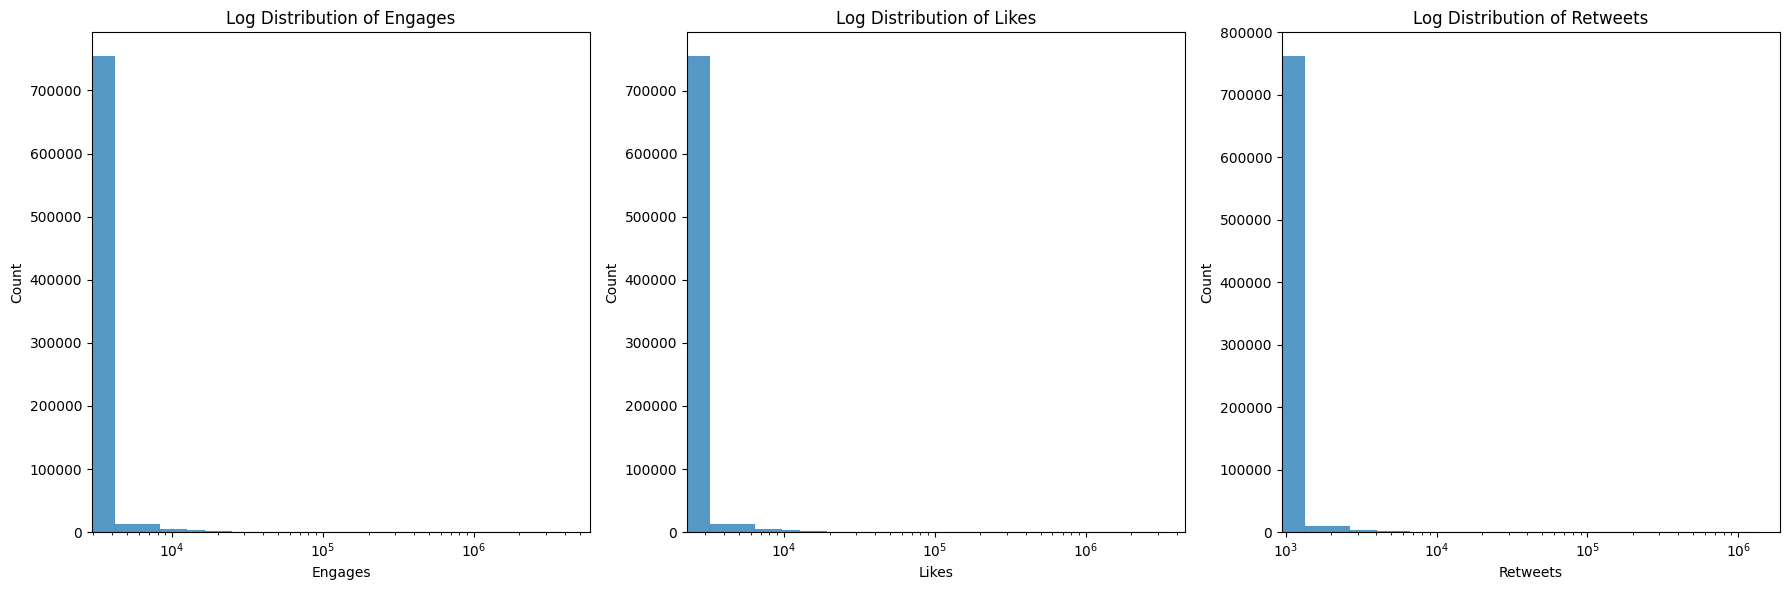

In [8]:
# Distributions of tweet engagement metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

sns.histplot(x='engages', data=df, ax=axes[0], bins=1000)
axes[0].set_xscale('log')
axes[0].set_title('Log Distribution of Engages')
axes[0].set_xlabel('Engages')

sns.histplot(x='likes', data=df, ax=axes[1], bins=1000)
axes[1].set_xscale('log')
axes[1].set_title('Log Distribution of Likes')
axes[1].set_xlabel('Likes')

sns.histplot(x='retweets', data=df, ax=axes[2], bins=1000)
axes[2].set_xscale('log')
axes[2].set_title('Log Distribution of Retweets')
axes[2].set_xlabel('Retweets')

plt.tight_layout()
plt.show()

Distribution shows very strong right (positive skew), may be worth using log transformed values in modelling

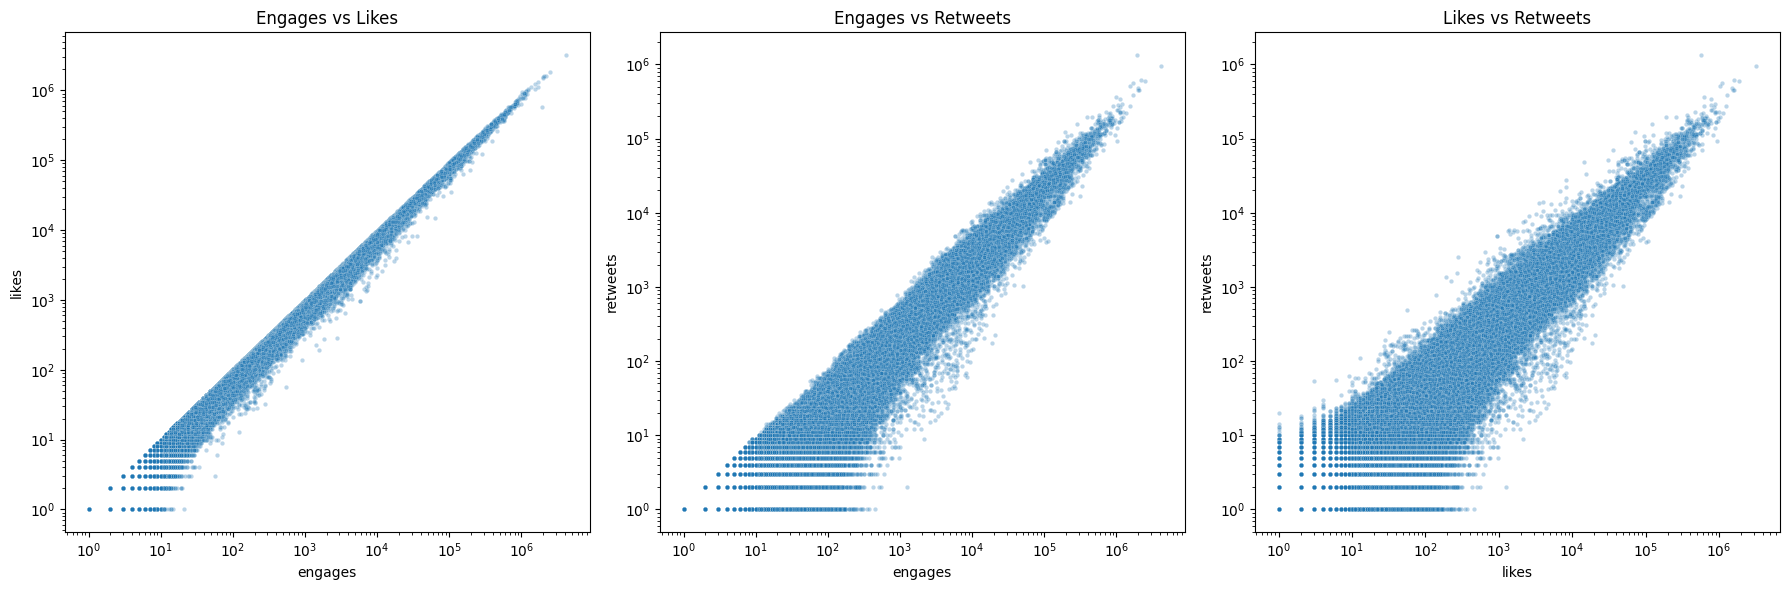

In [ ]:
#Look at correlations across tweet engagement metrics
fig, axes = plt.subplots(1, 3, figsize = (18,6))
sns.scatterplot(x = 'engages', y = 'likes', data = df, ax=axes[0],alpha = 0.3, s = 10)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title('Engages vs Likes')

sns.scatterplot(x='engages', y = 'retweets', data = df, ax = axes[1],alpha = 0.3, s = 10)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_title('Engages vs Retweets')

sns.scatterplot(x= 'likes', y = 'retweets', data = df, ax = axes[2], alpha = 0.3, s = 10)
axes[2].set_xscale('log')
axes[2].set_yscale('log')
axes[2].set_title('Likes vs Retweets')

plt.tight_layout()
plt.show()



In [ ]:
def log_corr_stats(x, y, df):
    # Filter to positive values to avoid log(0) or negatives
    mask = (df[x] > 0) & (df[y] > 0)
    log_x = np.log10(df.loc[mask, x])
    log_y = np.log10(df.loc[mask, y])
    
    slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
    r_squared = r_value ** 2
    return r_squared, p_value

# calculate stats for each pair
r2_1, pval_1 = log_corr_stats('engages', 'likes', df)
r2_2, pval_2 = log_corr_stats('engages', 'retweets', df)
r2_3, pval_3 = log_corr_stats('likes', 'retweets', df)

print(f"Engages vs Likes: R² = {r2_1:.3f}, p = {pval_1:.10e}")
print(f"Engages vs Retweets: R² = {r2_2:.3f}, p = {pval_2:.10e}")
print(f"Likes vs Retweets: R² = {r2_3:.3f}, p = {pval_3:.10e}")

Engages vs Likes: R² = 0.990, p = 0.0000000000e+00
Engages vs Retweets: R² = 0.930, p = 0.0000000000e+00
Likes vs Retweets: R² = 0.880, p = 0.0000000000e+00


Engagement metrics are strongly correlated with one another (as expected). May need to handle this redundacny in modelling

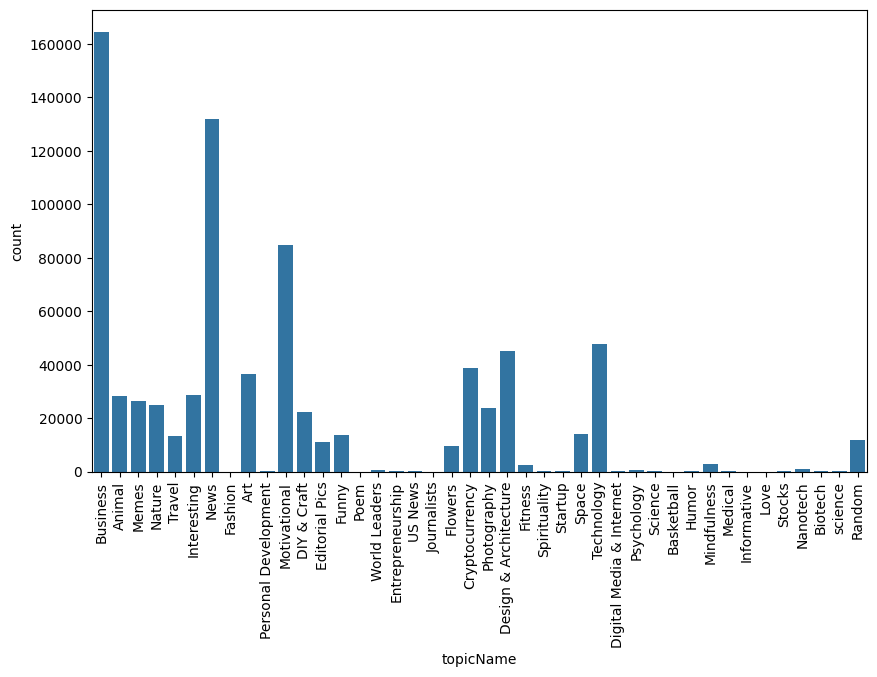

In [30]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'topicName', data = df)
#plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

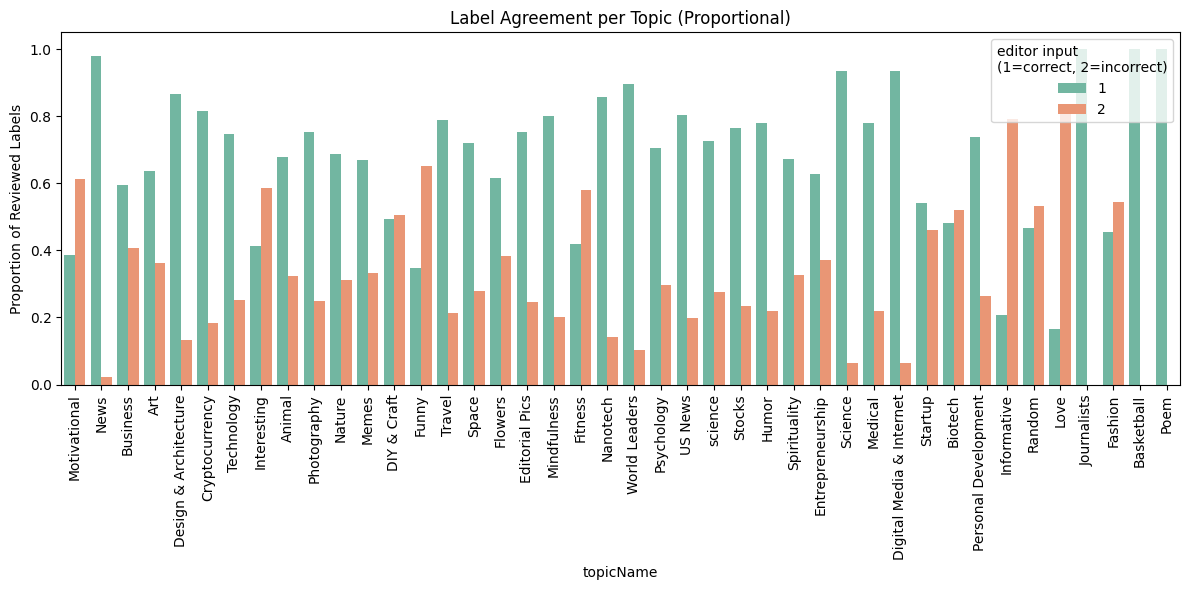

In [ ]:
# Are there categories that the algorithim is more likely to get right/wrong when a tweet is reviewed?
# Create normalized counts
plot_data = (
    df[df['edInput'].isin([1, 2])]  #select only where reviewer agrees or disagrees
    .groupby(['topicName', 'edInput'])
    .size()
    .reset_index(name='count')
)

# Compute total reviewed tweets per category - see whether total number of tweets is skewed towards one category or another (and which category to choose for my first binary classifier)
topic_totals = (
    plot_data.groupby('topicName')['count']
    .sum()
    .reset_index(name='total_reviews')
)
# Merge total counts back plot_data
plot_data = plot_data.merge(topic_totals, on='topicName')
plot_data = plot_data.sort_values('total_reviews', ascending=False)

# Normalize within each topicName
plot_data['prop'] = plot_data.groupby('topicName')['count'].transform(lambda x: x / x.sum())

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x='topicName', y='prop', hue='edInput', palette='Set2')
plt.xticks(rotation=90)
plt.ylabel("Proportion of Reviewed Labels")
plt.legend(title='editor input \n(1=correct, 2=incorrect)', loc='upper right')
plt.title("Label Agreement per Topic (Proportional)")
plt.tight_layout()
plt.show()

In [ ]:
# Business was most common in the original df, check dataset inclusing only reviewed tweets has more motirvational and news tweets
topic_totals.sort_values('total_reviews', ascending=False).head(10)

,topicName,total_reviews
23,Motivational,38130
26,News,32478
4,Business,30024
1,Art,25396
7,Design & Architecture,24009
5,Cryptocurrency,21682
37,Technology,19617
17,Interesting,17065
0,Animal,16130
28,Photography,15147


Looks like there are systematic differences in how algorithim is performing, among the more common topics 'Motivational' is very bad, 'News' is very good and 'Business' somewhere in the middle. 

# Generate clean, well-labelled dataset for analysis of label distribution and pre-processing

In [25]:
df.columns

Index(['tweetID', 'crDate', 'edInput', 'editor', 'engages', 'isApproved',
       'isEdNeed', 'isRT', 'likes', 'photoUrl', 'retweets', 'rtUsID', 'text',
       'topicName', 'usFlwrs', 'usID', 'usName', 'videoUrl'],
      dtype='object')

In [57]:
# Select only tweets that have been reviewed and apporved by an editor
df_clean = df.copy()
df_clean = df_clean[df_clean['edInput'] == 1]

# drop columns not needed for analysis
df_clean = df_clean.drop(columns=['tweetID', 'crDate','usName','photoUrl', 'rtUsID', 'usID', 'edInput', 'isEdNeed','videoUrl','editor','isApproved','usFlwrs'])
df_clean.shape #expect 215577

(215577, 6)

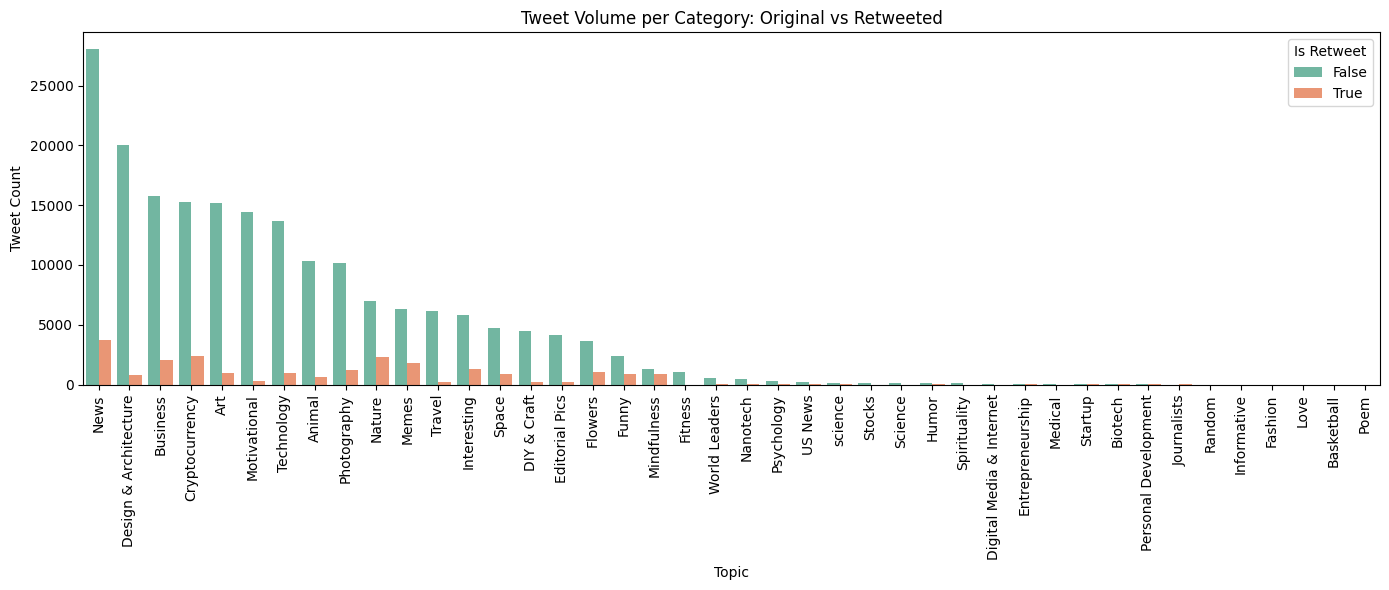

In [ ]:
#Handle retweets - look at distribution of retweet vs original tweets by category
rt_counts = (
    df_clean.groupby(['topicName', 'isRT'])
    .size()
    .reset_index(name='count')
    .sort_values(ascending=False, by='count')   
)

plt.figure(figsize=(14, 6))
sns.barplot(data=rt_counts, x='topicName', y='count', hue='isRT', palette='Set2')
plt.xticks(rotation=90)
plt.title("Tweet Volume per Category: Original vs Retweeted")
plt.ylabel("Tweet Count")
plt.xlabel("Topic")
plt.legend(title="Is Retweet")
plt.tight_layout()
plt.show()

In [ ]:
# Are retweets duplicates of tweets in the dataset?
retweets = df[df['isRT'] == True]
originals = df[df['isRT'] == False]

# Find retweet texts that also appear in originals
overlapping_texts = retweets['text'].isin(originals['text'])

# Count how many retweets are duplicates of originals
num_overlap = overlapping_texts.sum()
num_retweets = len(retweets)
print(f"{num_overlap} out of {num_retweets} retweets are exact duplicates of original tweets")

3840 out of 134915 retweets duplicates of original tweets


In [ ]:
df_clean['isRT'].value_counts()

In [70]:
#probably easiset just to drop retweets, for now?
# drop retweets
df_clean = df_clean[df_clean['isRT'] == False]
df_clean = df_clean.drop(columns=['isRT'])
df_clean.shape

(192314, 5)

In [58]:
df_clean.columns

Index(['engages', 'isRT', 'likes', 'retweets', 'text', 'topicName'], dtype='object')

## Target label distribution analysis

Text(0.5, 1.0, 'Distribution of Topic Names in Cleaned Dataset')

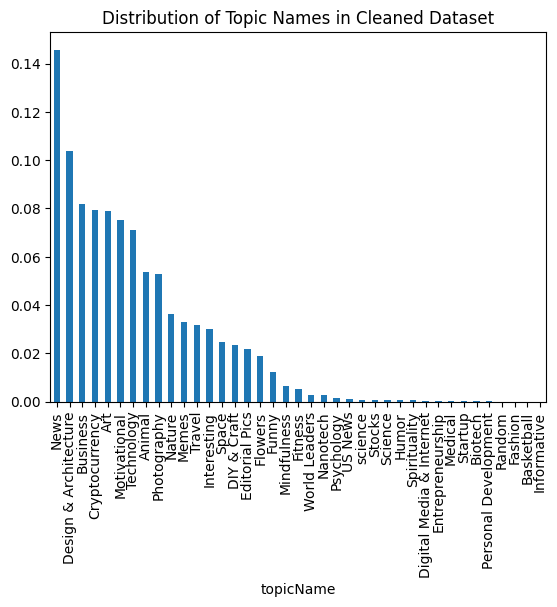

In [69]:
# Look at distribution of topic names in the cleaned dataset (where we're confident in the labels)
df_clean['topicName'].value_counts(normalize= True).plot(kind='bar') #show proportions instead of absolute counts
plt.title('Distribution of Topic Names in Cleaned Dataset')

All the topics will be imbalanced in a binary base model classifier, maybe start with news as this is the largest category (and also, potentially easier to classify given the figure above showing this was generally correctly-labelled)?

## Retweets